In [24]:
#Libraries added
import pandas as pd
import numpy as np

import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
#The file to be processed is assigned to the variable
src = "residentialDwellingPropertyTransactions.csv"

In [3]:
#Dataframe created
firstDF = pd.read_csv(src)

In [4]:
#First 5 lines viewed
firstDF.head(5)

,Statistic Label,Month,County,Dwelling Status,Stamp Duty Event,Type of Buyer,Type of Sale,UNIT,VALUE
0,Volume of Sales,2010 January,Carlow,New,Filings,Household Buyer - All,Market,Number,5.0
1,Volume of Sales,2010 January,Carlow,New,Filings,Household Buyer - All,Non-Market,Number,0.0
2,Volume of Sales,2010 January,Carlow,New,Filings,Household Buyer - First-Time Buyer Owner-Occupier,Market,Number,0.0
3,Volume of Sales,2010 January,Carlow,New,Filings,Household Buyer - First-Time Buyer Owner-Occupier,Non-Market,Number,0.0
4,Volume of Sales,2010 January,Carlow,New,Filings,Household Buyer - Former Owner-Occupier,Market,Number,3.0


In [5]:
# Last 5 lines viewed
firstDF.tail(5)

,Statistic Label,Month,County,Dwelling Status,Stamp Duty Event,Type of Buyer,Type of Sale,UNIT,VALUE
682235,Median Price,2023 August,Monaghan,Existing,Executions,Household Buyer - Former Owner-Occupier,Non-Market,Euro,165000.0
682236,Median Price,2023 August,Monaghan,Existing,Executions,Household Buyer - Non-Occupier,Market,Euro,NaN
682237,Median Price,2023 August,Monaghan,Existing,Executions,Household Buyer - Non-Occupier,Non-Market,Euro,35000.0
682238,Median Price,2023 August,Monaghan,Existing,Executions,Non-Household Buyer,Market,Euro,39750.0
682239,Median Price,2023 August,Monaghan,Existing,Executions,Non-Household Buyer,Non-Market,Euro,NaN


In [6]:
#To provide clearer data, division was made in the months column
firstDF[['Year', 'Month']] = firstDF.Month.str.split(' ', expand=True)

In [7]:
#Total number of columns and rows were checked
firstDF.shape

(682240, 10)

In [8]:
#The names of the columns were learned
firstDF.columns

Index(['Statistic Label', 'Month', 'County', 'Dwelling Status',
       'Stamp Duty Event', 'Type of Buyer', 'Type of Sale', 'UNIT', 'VALUE',
       'Year'],
      dtype='object')

In [9]:
#Data types of columns were learned
firstDF.dtypes

Statistic Label      object
Month                object
County               object
Dwelling Status      object
Stamp Duty Event     object
Type of Buyer        object
Type of Sale         object
UNIT                 object
VALUE               float64
Year                 object
dtype: object

In [18]:
firstDF.count()

Statistic Label     682240
Month               682240
County              682240
Dwelling Status     682240
Stamp Duty Event    682240
Type of Buyer       682240
Type of Sale        682240
UNIT                682240
VALUE               580400
Year                682240
dtype: int64

In [10]:
#More detailed information was received about the columns
firstDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682240 entries, 0 to 682239
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Statistic Label   682240 non-null  object 
 1   Month             682240 non-null  object 
 2   County            682240 non-null  object 
 3   Dwelling Status   682240 non-null  object 
 4   Stamp Duty Event  682240 non-null  object 
 5   Type of Buyer     682240 non-null  object 
 6   Type of Sale      682240 non-null  object 
 7   UNIT              682240 non-null  object 
 8   VALUE             580400 non-null  float64
 9   Year              682240 non-null  object 
dtypes: float64(1), object(9)
memory usage: 52.1+ MB


In [11]:
#Rows containing null values were detected
firstDF.isnull().sum()

Statistic Label          0
Month                    0
County                   0
Dwelling Status          0
Stamp Duty Event         0
Type of Buyer            0
Type of Sale             0
UNIT                     0
VALUE               101840
Year                     0
dtype: int64

In [12]:
#Rows with NaN values were ignored
firstDF[firstDF['VALUE'].notna()]

,Statistic Label,Month,County,Dwelling Status,Stamp Duty Event,Type of Buyer,Type of Sale,UNIT,VALUE,Year
0,Volume of Sales,January,Carlow,New,Filings,Household Buyer - All,Market,Number,5.0,2010
1,Volume of Sales,January,Carlow,New,Filings,Household Buyer - All,Non-Market,Number,0.0,2010
2,Volume of Sales,January,Carlow,New,Filings,Household Buyer - First-Time Buyer Owner-Occupier,Market,Number,0.0,2010
3,Volume of Sales,January,Carlow,New,Filings,Household Buyer - First-Time Buyer Owner-Occupier,Non-Market,Number,0.0,2010
4,Volume of Sales,January,Carlow,New,Filings,Household Buyer - Former Owner-Occupier,Market,Number,3.0,2010
...,...,...,...,...,...,...,...,...,...,...
682232,Median Price,August,Monaghan,Existing,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Market,Euro,225000.0,2023
682234,Median Price,August,Monaghan,Existing,Executions,Household Buyer - Former Owner-Occupier,Market,Euro,224000.0,2023
682235,Median Price,August,Monaghan,Existing,Executions,Household Buyer - Former Owner-Occupier,Non-Market,Euro,165000.0,2023
682237,Median Price,August,Monaghan,Existing,Executions,Household Buyer - Non-Occupier,Non-Market,Euro,35000.0,2023


In [42]:
new_names =  {'UNIT': 'Unit', 'VALUE': 'Value'}


In [43]:
firstDF.rename(columns=new_names, inplace=True)

In [44]:
firstDF.head()

,Statistic Label,Month,County,Dwelling Status,Stamp Duty Event,Type of Buyer,Type of Sale,Unit,Value,Year
0,Volume of Sales,January,Carlow,New,Filings,Household Buyer - All,Market,Number,5.0,2010
1,Volume of Sales,January,Carlow,New,Filings,Household Buyer - All,Non-Market,Number,0.0,2010
2,Volume of Sales,January,Carlow,New,Filings,Household Buyer - First-Time Buyer Owner-Occupier,Market,Number,0.0,2010
3,Volume of Sales,January,Carlow,New,Filings,Household Buyer - First-Time Buyer Owner-Occupier,Non-Market,Number,0.0,2010
4,Volume of Sales,January,Carlow,New,Filings,Household Buyer - Former Owner-Occupier,Market,Number,3.0,2010


In [45]:
#It was checked again whether the Nan values were present or not
firstDF.isnull().sum()

Statistic Label          0
Month                    0
County                   0
Dwelling Status          0
Stamp Duty Event         0
Type of Buyer            0
Type of Sale             0
Unit                     0
Value               101840
Year                     0
dtype: int64

In [14]:
#It was made an int to avoid confusion when using Year Column
firstDF["Year"] = firstDF["Year"].apply(np.int64)

In [15]:
#Describe function was used
print(firstDF['Statistic Label'].describe())
print("----------")
print(firstDF['Month'].describe())
print("----------")
print(firstDF['County'].describe())
print("----------")
print(firstDF['Dwelling Status'].describe())
print("----------")
print(firstDF['Stamp Duty Event'].describe())
print("----------")
print(firstDF['Type of Buyer'].describe())
print("----------")
print(firstDF['Type of Sale'].describe())
print("----------")
print(firstDF['Unit'].describe())


count              682240
unique                  4
top       Volume of Sales
freq               170560
Name: Statistic Label, dtype: object
----------
count      682240
unique         12
top       January
freq        58240
Name: Month, dtype: object
----------
count     682240
unique        26
top       Carlow
freq       26240
Name: County, dtype: object
----------
count     682240
unique         2
top          New
freq      341120
Name: Dwelling Status, dtype: object
----------
count      682240
unique          2
top       Filings
freq       341120
Name: Stamp Duty Event, dtype: object
----------
count                    682240
unique                        5
top       Household Buyer - All
freq                     136448
Name: Type of Buyer, dtype: object
----------
count     682240
unique         2
top       Market
freq      341120
Name: Type of Sale, dtype: object
----------
count     682240
unique         3
top         Euro
freq      341120
Name: UNIT, dtype: object


In [16]:
#Unique function was used
print(firstDF['Statistic Label'].unique())
print("----------")
print(firstDF['Month'].unique())
print("----------")
print(firstDF['County'].unique())
print("----------")
print(firstDF['Dwelling Status'].unique())
print("----------")
print(firstDF['Stamp Duty Event'].unique())
print("----------")
print(firstDF['Type of Buyer'].unique())
print("----------")
print(firstDF['Type of Sale'].unique())
print("----------")
print(firstDF['Unit'].unique())
print("----------")
print(firstDF['Year'].unique())

['Volume of Sales' 'Value of Sales' 'Mean Sale Price' 'Median Price']
----------
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
----------
['Carlow' 'Dublin' 'Kildare' 'Kilkenny' 'Laois' 'Longford' 'Louth' 'Meath'
 'Offaly' 'Westmeath' 'Wexford' 'Wicklow' 'Clare' 'Cork' 'Kerry'
 'Limerick' 'Tipperary' 'Waterford' 'Galway' 'Leitrim' 'Mayo' 'Roscommon'
 'Sligo' 'Cavan' 'Donegal' 'Monaghan']
----------
['New' 'Existing']
----------
['Filings' 'Executions']
----------
['Household Buyer - All'
 'Household Buyer - First-Time Buyer Owner-Occupier'
 'Household Buyer - Former Owner-Occupier'
 'Household Buyer - Non-Occupier' 'Non-Household Buyer']
----------
['Market' 'Non-Market']
----------
['Number' 'Euro Million' 'Euro']
----------
[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


<AxesSubplot:xlabel='VALUE'>

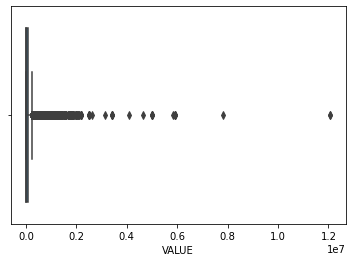

In [21]:
sns.boxplot(x=firstDF["Value"])

Text(0.5, 0, 'Year')

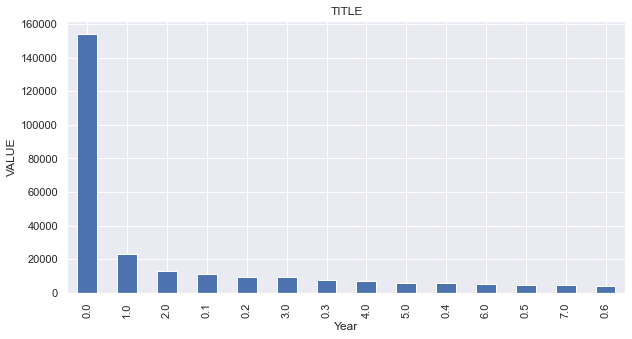

In [30]:
firstDF.VALUE.value_counts().nlargest(14).plot(kind="bar", figsize=(10,5))
plt.title("TITLE")
plt.ylabel("Value")
plt.xlabel("Year")

,VALUE,Year
VALUE,1.000000,0.102831
Year,0.102831,1.000000


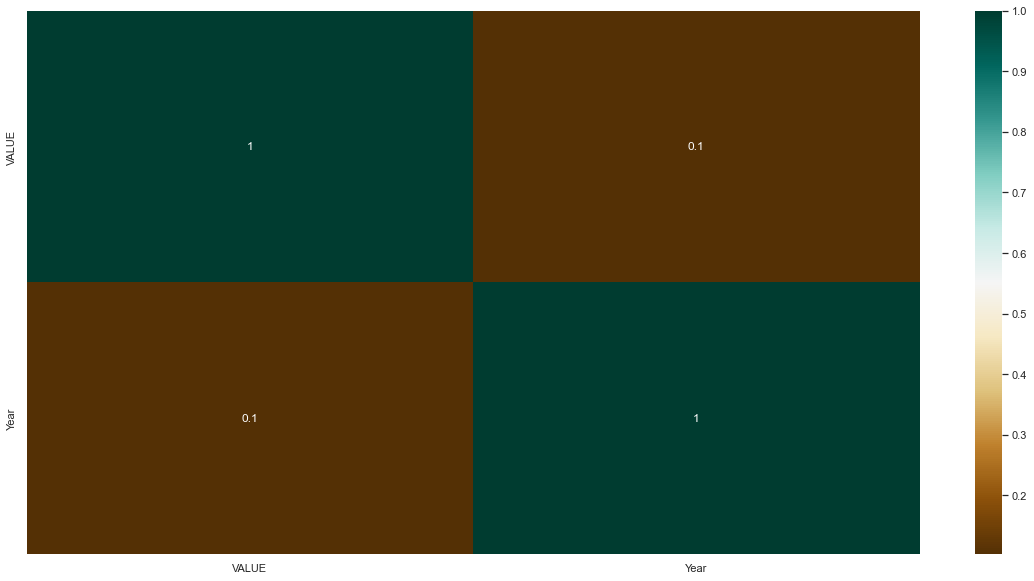

In [31]:
plt.figure(figsize=(20,10))
c= firstDF.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

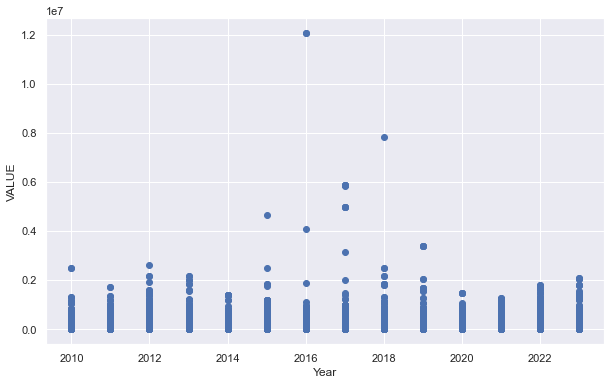

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(firstDF["Year"], firstDF["Value"])
ax.set_xlabel("Year")
ax.set_ylabel("Value")
plt.show()

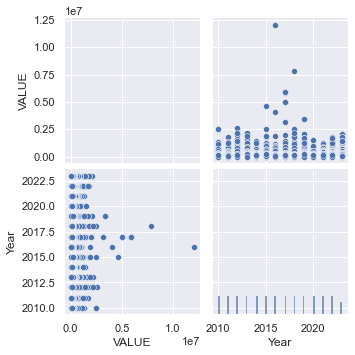

In [34]:
sns.pairplot(firstDF)

array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

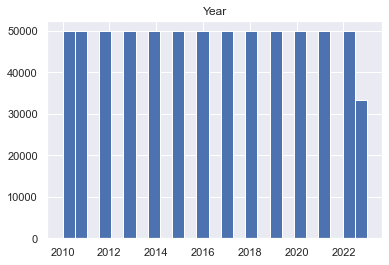

In [54]:
firstDF.hist(column='Year', bins=25)

In [ ]:
#sns.catplot("cut", data=diamonds_df, aspect=1.5, kind="count", color="b") 

In [ ]:
"""from numpy import median, mean
sns.set(style="whitegrid")
ax = sns.barplot(x="cut", y="price", data=diamonds_df,estimator=mean)"""

ax = sns.barplot(x="cut", y="price", data=diamonds_df, estimator=mean, ci=68,
order=['Ideal','Good','Very Good','Fair','Premium']) 